In [1]:
%matplotlib qt
#%matplotlib inline

In [2]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import mne.viz
import os
import os.path as op

import numpy as np

import seaborn as sns

from warnings import simplefilter
#ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')


# MEG data 

In [21]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG', 'sample')
raw = mne.io.read_raw_fif(op.join(data_path, 'sample_audvis_raw.fif'))
#raw.set_eeg_reference()  # set EEG average reference
events = mne.read_events(op.join(data_path, 'sample_audvis_raw-eve.fif'))

Opening raw data file /Users/marieconstance.corsi/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [ ]:
raw.plot(block=True)

Channels marked as bad:
['MEG 2443', 'EEG 053']


In [ ]:
raw.plot_sensors(kind='3d', ch_type='mag', ch_groups='position')

In [ ]:
# hint on artifacts
projs = mne.read_proj(op.join(data_path, 'sample_audvis_eog-proj.fif'))
raw.add_proj(projs)
raw.plot_projs_topomap()

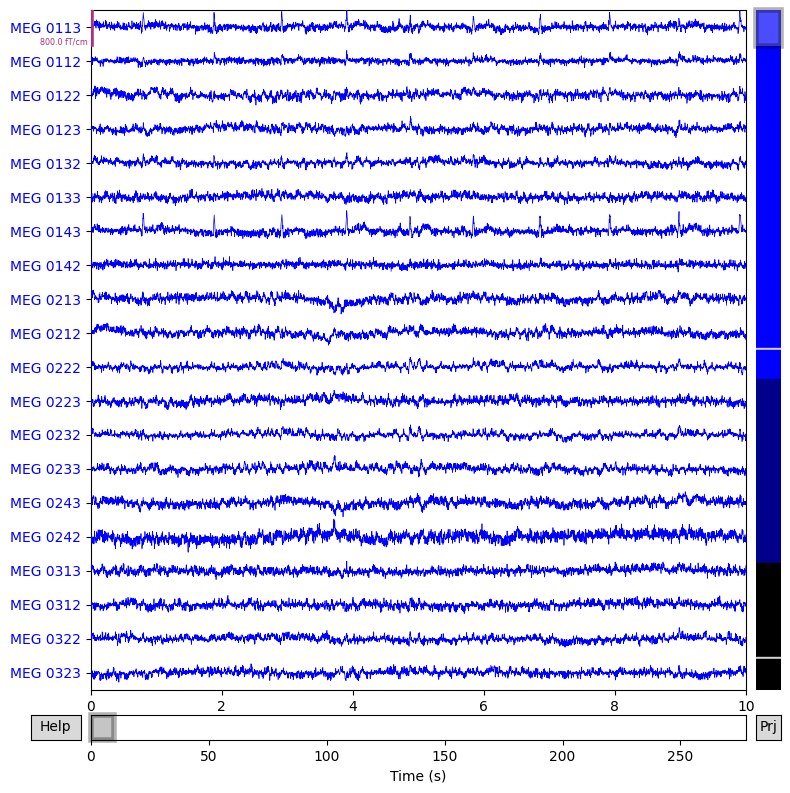

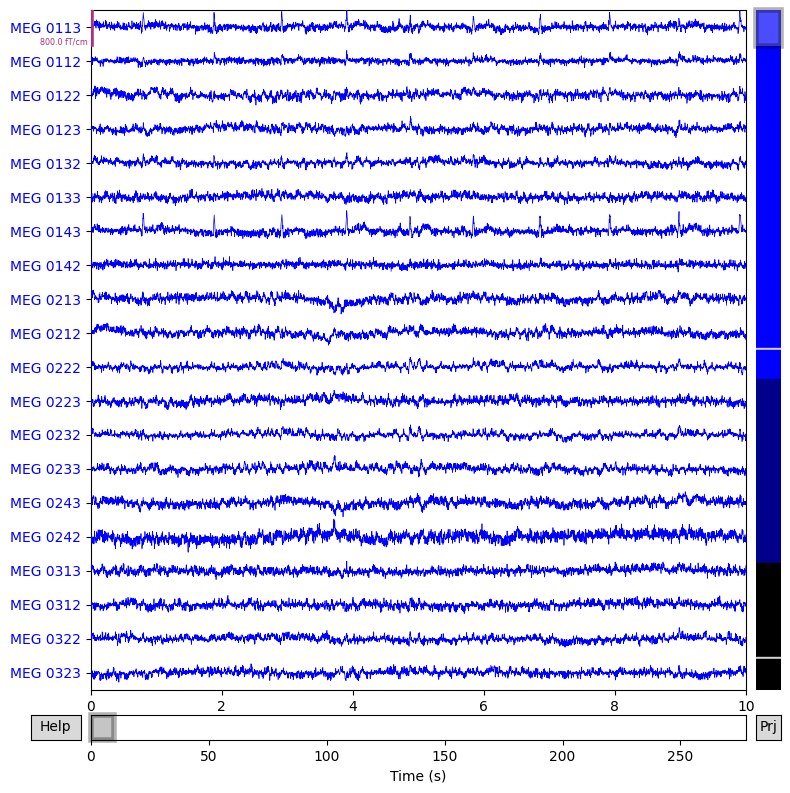

In [17]:
raw.plot()

## Let's see some other dataset...

In [3]:
## Load dataset & plot raw data
    # run 1: Baseline, eyes open
    # run 2: Baseline, eyes closed
    # runs 3, 7, 11: Motor execution: left vs right hand
    # runs 4, 8, 12: Motor imagery: left vs right hand
    # runs 5, 9, 13: Motor execution: hands vs feet
    # runs 6, 10, 14: Motor imagery: hands vs feet

#Define the parameters
subject = 1  # use data from subject 1
runs = [1]  # just to look at resting state data

#Get data and locate in to given path
files = eegbci.load_data(subject, runs, '../datasets/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)

raw_data = raw_obj.get_data()
print("Number of channels: ", str(len(raw_data)))
print("Number of samples: ", str(len(raw_data[0])))


Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/M2-MVA_MEEG_hands-on_materials/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Number of channels:  64
Number of samples:  9760


In [ ]:
# Plot timeseries
raw_obj.plot(block=True)
#raw_obj.plot(duration=120, n_channels=15, scalings=dict(eeg=420e-6))

In [ ]:
# Plot PSD
raw_obj.plot_psd(average=True)

In [5]:
# check for events
subject = 1  # use data from subject 1
runs = [6, 10, 14]  # use only hand and feet motor imagery runs

#Get data and locate in to given path
files = eegbci.load_data(subject, runs, '../datasets/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)

raw_data = raw_obj.get_data()

Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/M2-MVA_MEEG_hands-on_materials/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/M2-MVA_MEEG_hands-on_materials/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/M2-MVA_MEEG_hands-on_materials/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [6]:
events, _ = mne.events_from_annotations(raw_obj, event_id=dict(T1=2, T2=3))
#picks = mne.pick_channels(raw.info["ch_names"], ["C3", "Cz", "C4"])

# epoch data
tmin, tmax = -1, 4  # define epochs around events (in s)
event_ids = dict(hands=2, feet=3)  # map event IDs to tasks

epochs = mne.Epochs(raw_obj, events, event_ids, tmin - 0.5, tmax + 0.5, #picks=picks, 
                    baseline=None, preload=True)


Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 961 original time points ...
0 bad epochs dropped


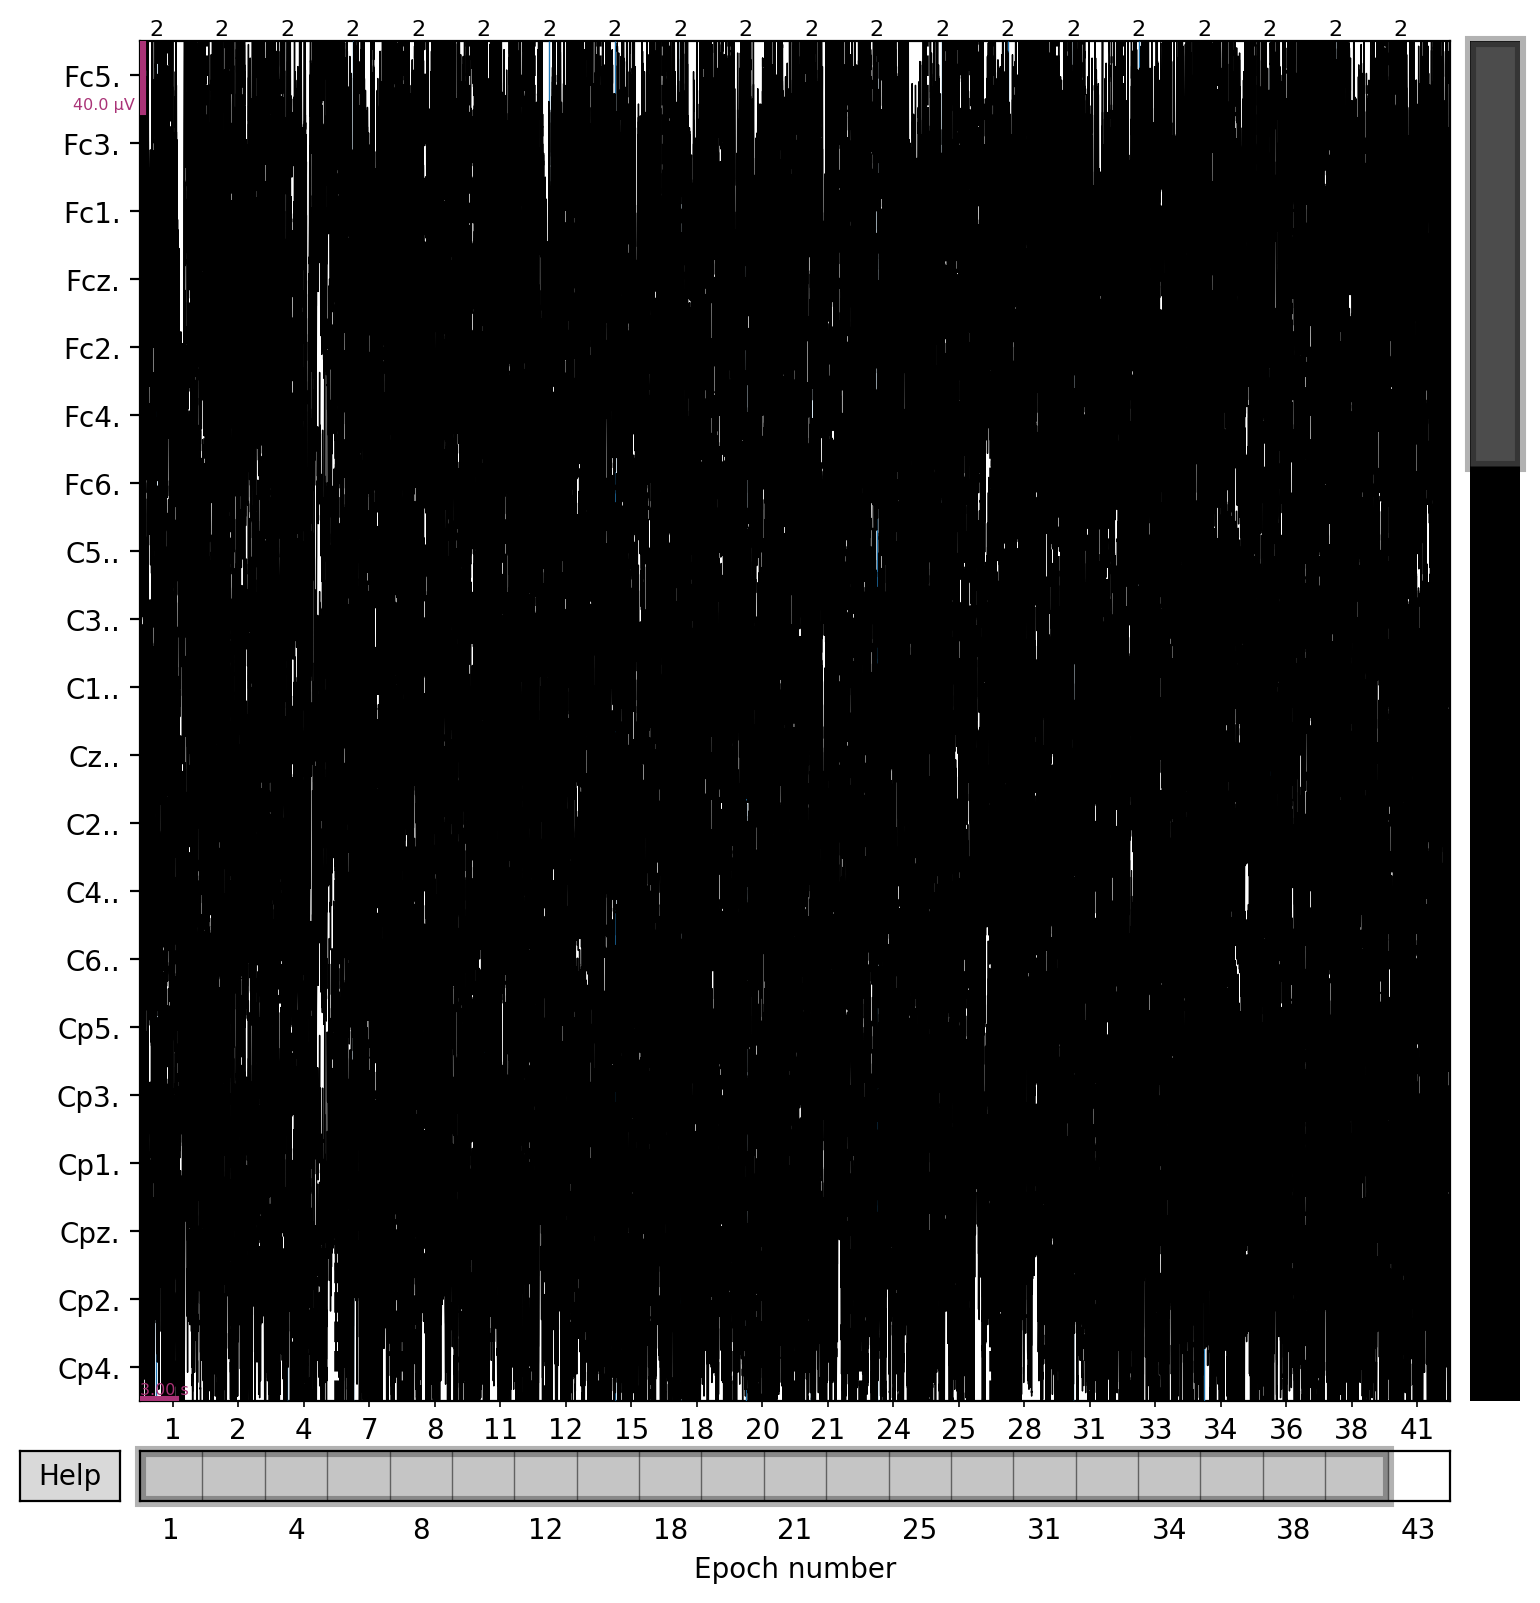

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [9]:
epochs["hands"].plot(
    events=events
)


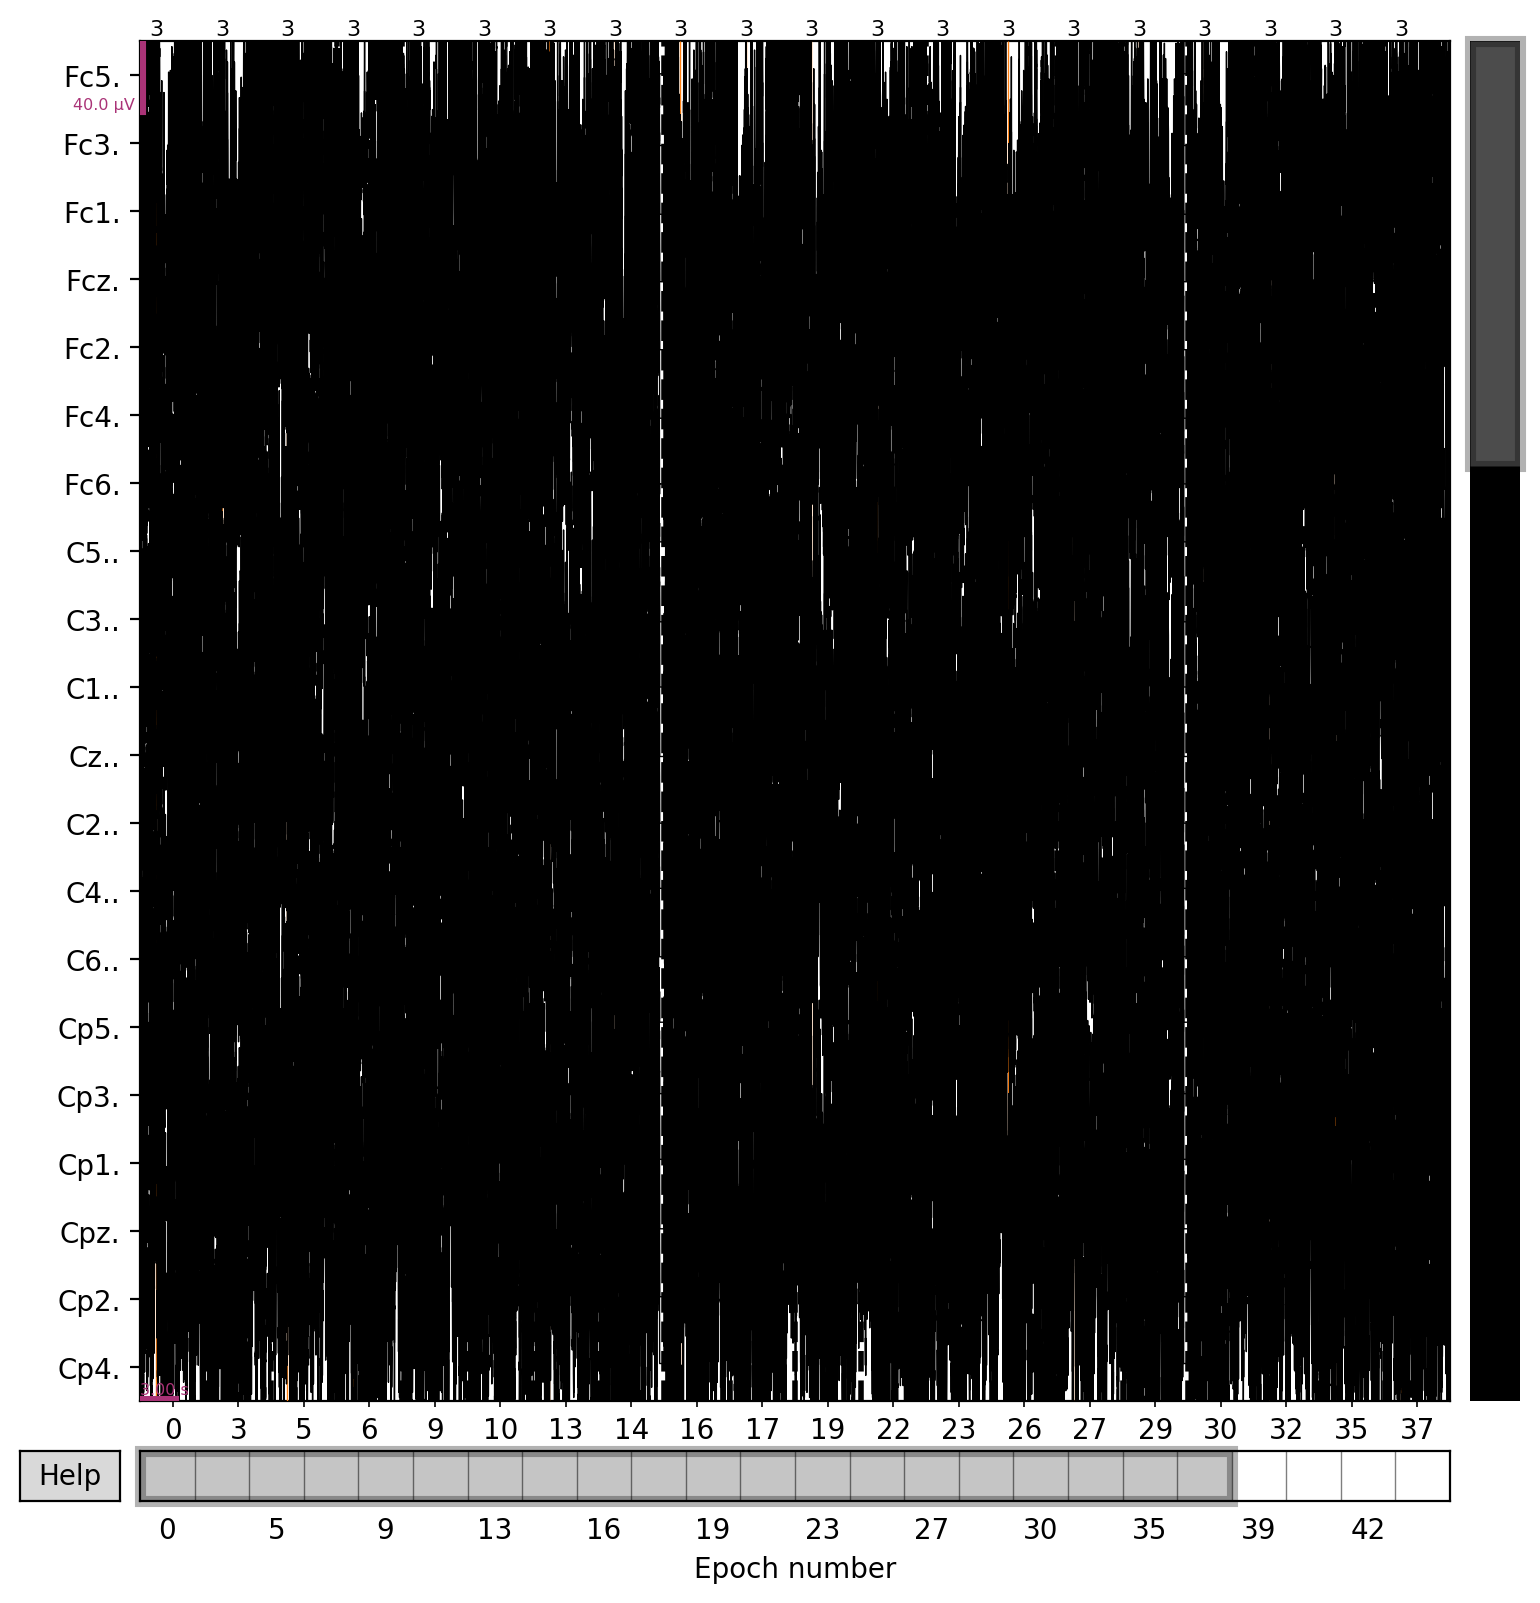

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [10]:
epochs["feet"].plot(
    events=events
)

In [ ]:
epochs.plot_sensors(kind="3d", ch_type="eeg")
epochs.plot_sensors(kind="topomap", ch_type="eeg")

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/var/folders/zr/jp94ly8d1vzdd9by_lpcbl6m000j9z/T/ipykernel_51003/1698274374.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs["hands"].compute_psd().plot(picks="eeg", exclude="bads")


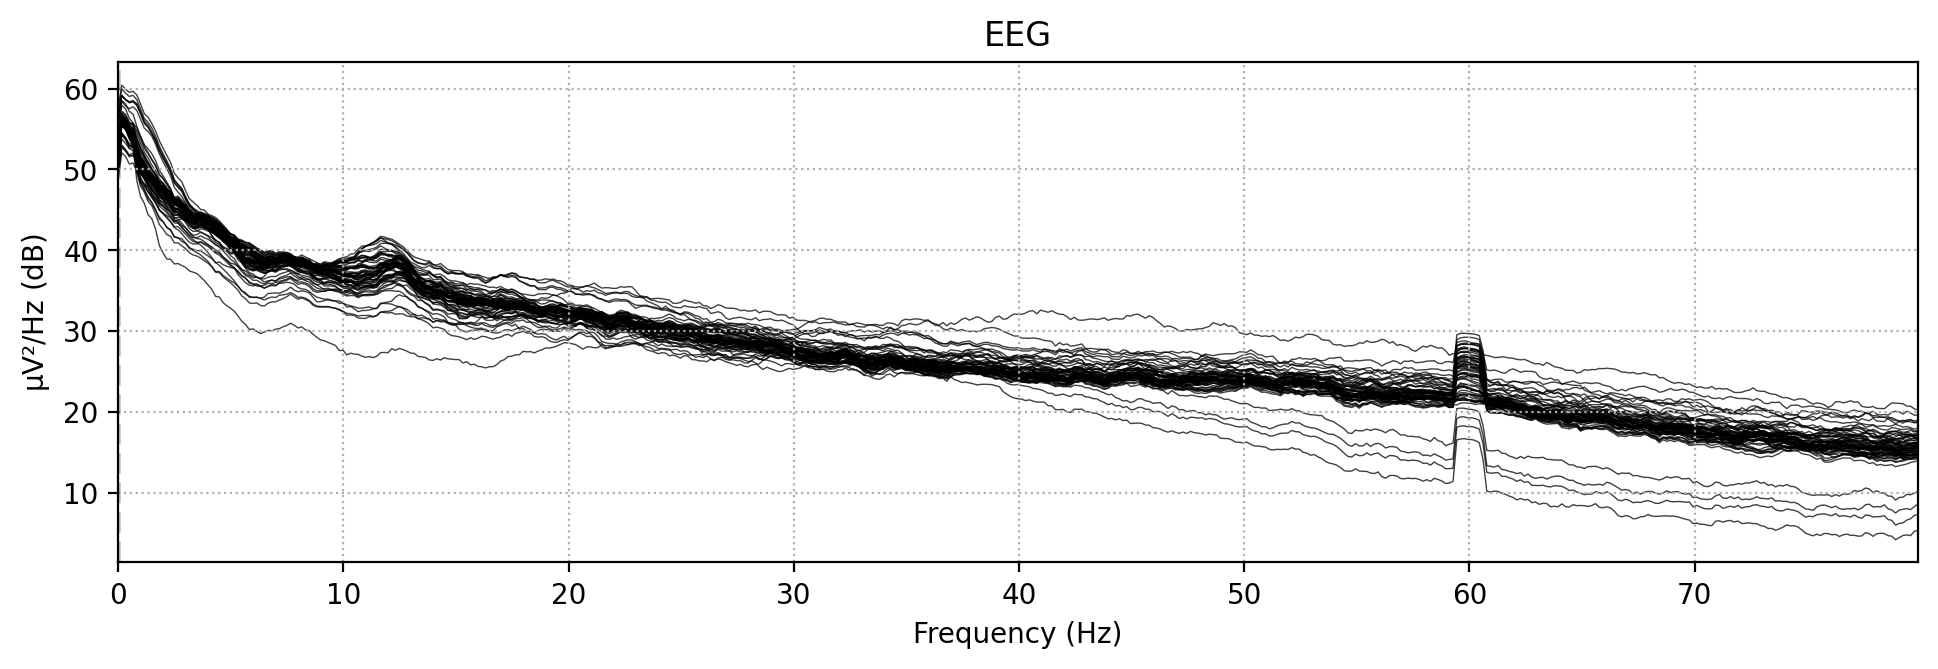

In [12]:
epochs["hands"].compute_psd().plot(picks="eeg", exclude="bads")

In [22]:
epochs["hands"].plot_image(picks="eeg", combine="mean")

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


[<Figure size 1280x960 with 3 Axes>]

In [30]:
mne.viz.plot_epochs_image(
    epochs,
    [10, 11],
    sigma=0.5,
    #order=order_func,
    vmin=-250,
    vmax=250,
    #overlay_times=plt_times,
    show=True,
)
#epochs["hands"].plot_epochs_image(picks=["C3", "Cz", "C4"])

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated


/var/folders/zr/jp94ly8d1vzdd9by_lpcbl6m000j9z/T/ipykernel_51003/1670584162.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_epochs_image(
/var/folders/zr/jp94ly8d1vzdd9by_lpcbl6m000j9z/T/ipykernel_51003/1670584162.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_epochs_image(


[<Figure size 1280x960 with 3 Axes>, <Figure size 1280x960 with 3 Axes>]